# 1. Réseaux mono-couche pour la classification
a) Charger le fichier de données dataset1.dat.
Préciser le nombre d’observations, leurs dimensions et le nombre de classes.
Séparer les données en bases d’apprentissage et de test avec un ratio de 70/30. Afficher les
données.

Number of observations: 300
Dimensions: 2
Number of classes: 3


<Figure size 640x480 with 0 Axes>

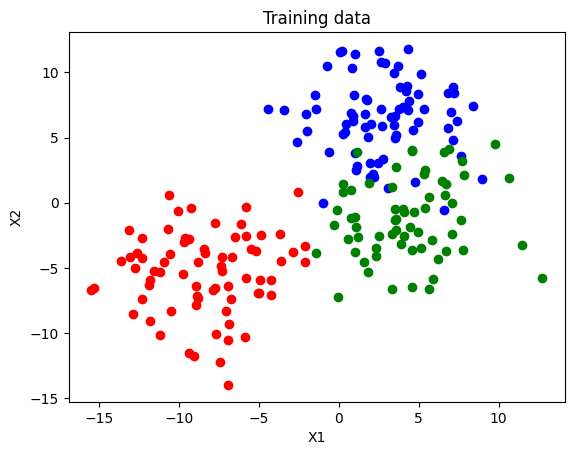

<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Load the dataset
data = pd.read_csv('../TD1/dataset.dat', sep=' ', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

plt.figure()

b) Dans la suite, on utilisera l’instruction suivante pour définir un réseau de neurones classifieur
mono-couche :
```clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')```
À quoi correspondent ces différents paramètres ?
Compte tenu des informations déterminées en a), préciser le nombre de paramètres libres
(poids et biais) de ce réseau.

In [28]:
from sklearn.linear_model import SGDClassifier

# Parameters
A = 0.000001
B = 1

# Number of free parameters
n_params = n_dim + 1
print(f'Number of free parameters: {n_params}')

# Create the classifier
clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')

Number of free parameters: 3


c) Répéter cinq fois l’expérience suivante :
Entraîner ce réseau (fonction fit) en utilisant les paramètres suivants :
* A = 0.000001 B = 1

A chaque fois, stocker le taux de reconnaissance (fonction score) en apprentissage.
Afficher la moyenne et l’écart-type de ce taux.
Afficher les frontières apprises et les données d’apprentissage.

Mean score: 0.8590476190476191
Standard deviation: 0.020995626366712965


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

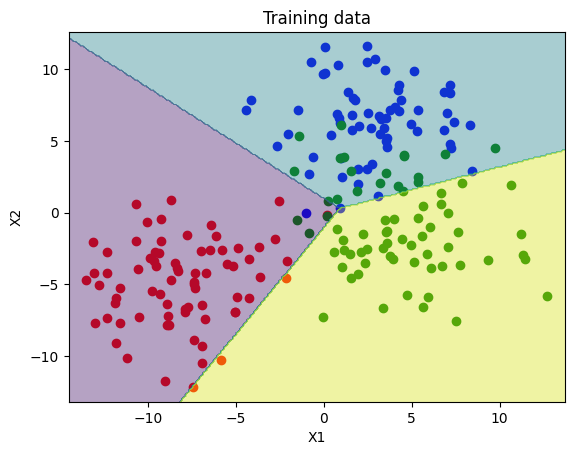

In [29]:
from sklearn.metrics import accuracy_score
# Parameters
A = 0.000001
B = 1  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

# Display the results
print(f'Mean score: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

d) Répéter l’expérience c) en utilisant les paramètres suivants :
* A = 1 B = 1
* A = 0.000001 B = 10
* A = 1 B = 10


Mean score: 0.17809523809523808
Standard deviation: 0.3561904761904762


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


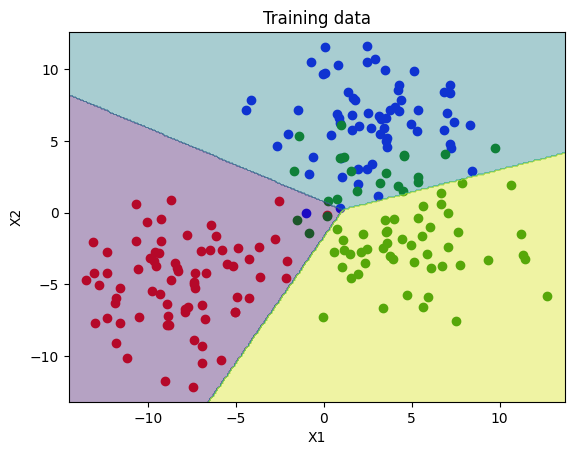

Mean score: 0.3580952380952381
Standard deviation: 0.43858564684051443


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


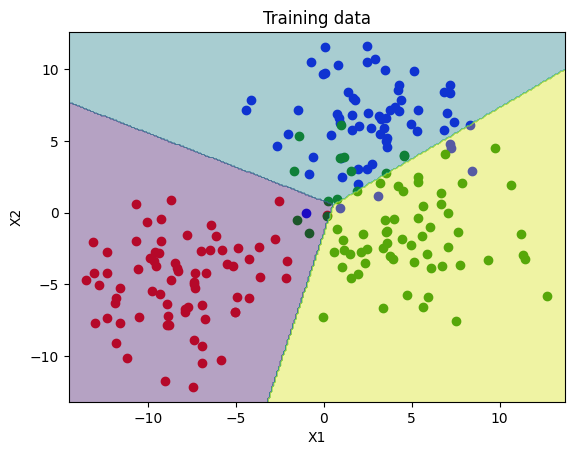

Mean score: 0.5419047619047619
Standard deviation: 0.44255903945277236


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


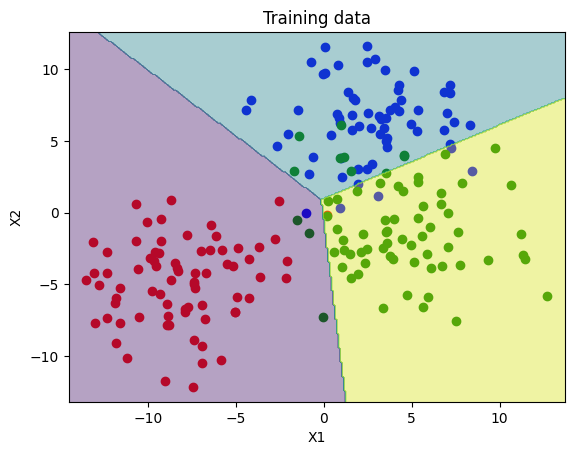

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.7104761904761905
Standard deviation: 0.3561242617344659


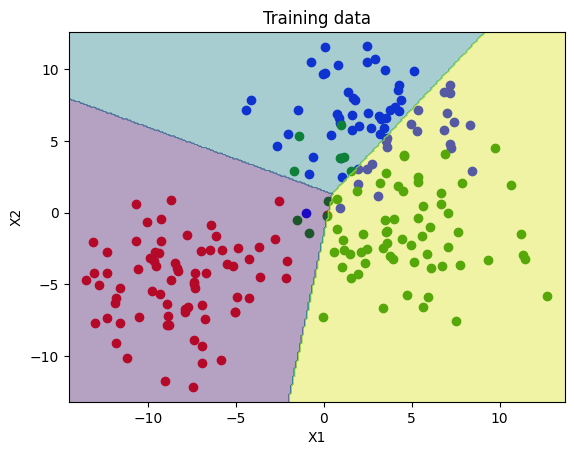

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.8904761904761905
Standard deviation: 0.025555062599997586


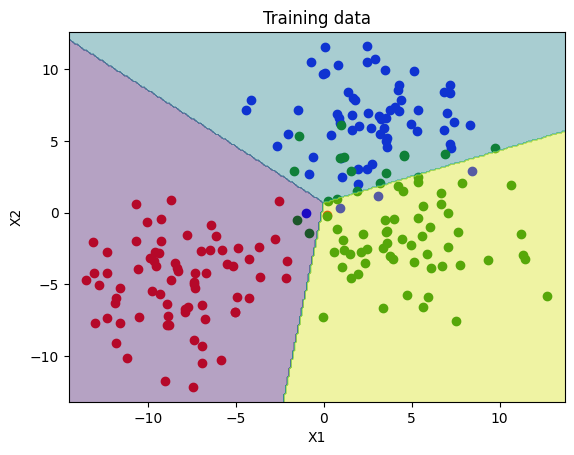

In [30]:
# Parameters
A = 1
B = 1  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()



Mean score: 0.18
Standard deviation: 0.36


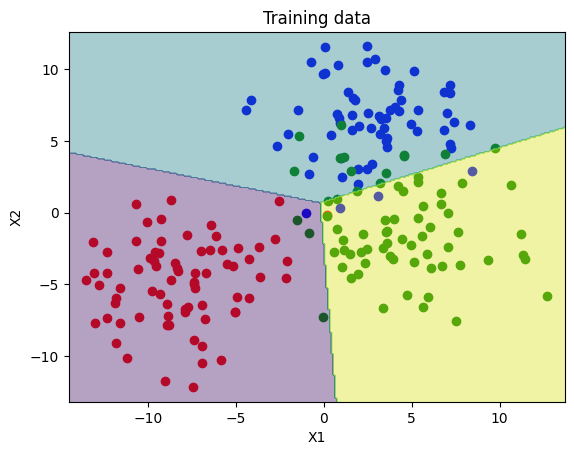

Mean score: 0.36
Standard deviation: 0.440908153700972


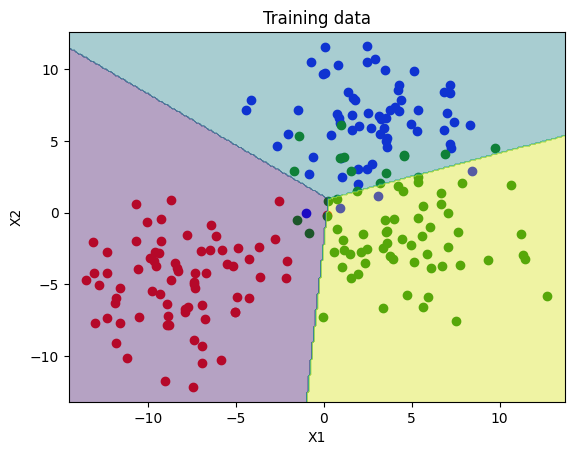

Mean score: 0.4990476190476191
Standard deviation: 0.41427367251246067


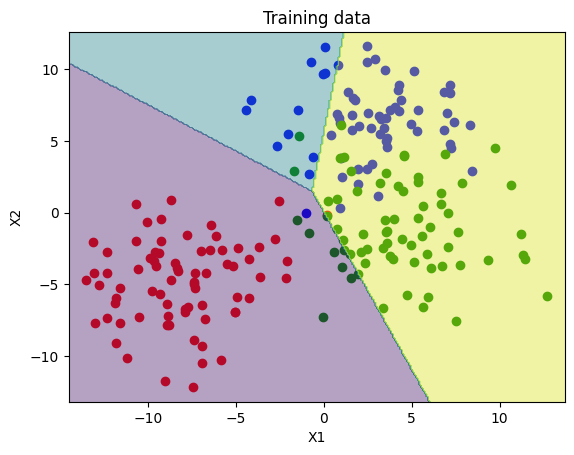

Mean score: 0.680952380952381
Standard deviation: 0.34988822316203066


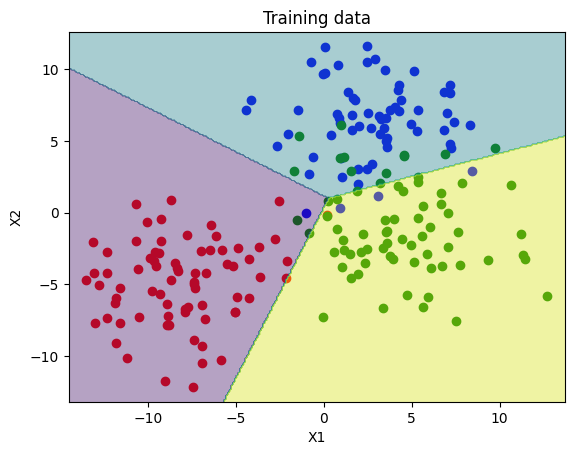

Mean score: 0.8447619047619048
Standard deviation: 0.08162743747510905


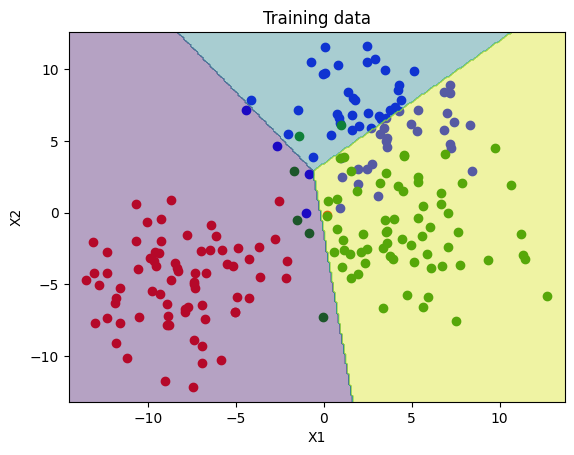

In [31]:
# Parameters
A = 0.000001
B = 10  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)
    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()




Mean score: 0.17809523809523808
Standard deviation: 0.3561904761904762


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


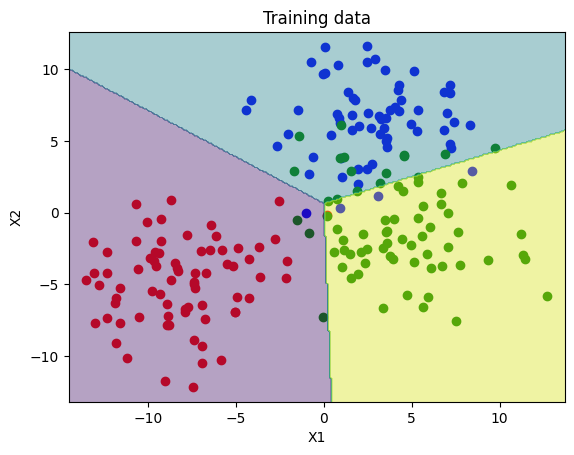

Mean score: 0.34285714285714286
Standard deviation: 0.420441405021781


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


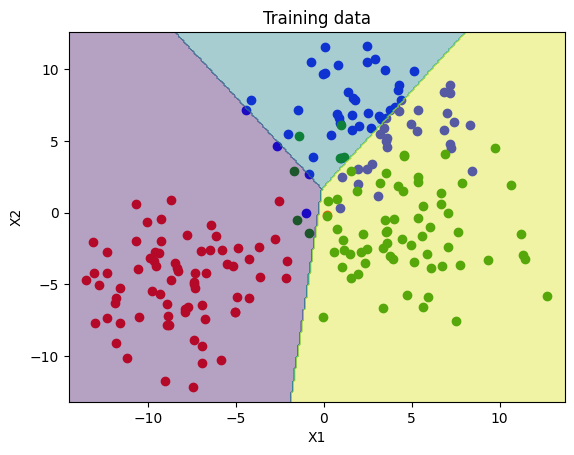

Mean score: 0.5123809523809524
Standard deviation: 0.41890257229977124


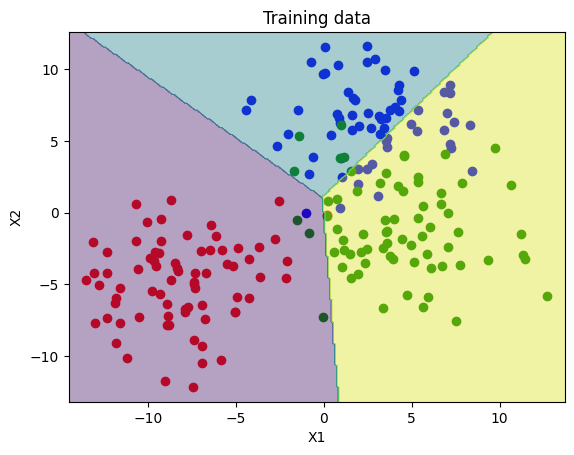

Mean score: 0.6961904761904761
Standard deviation: 0.3496600227639333


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


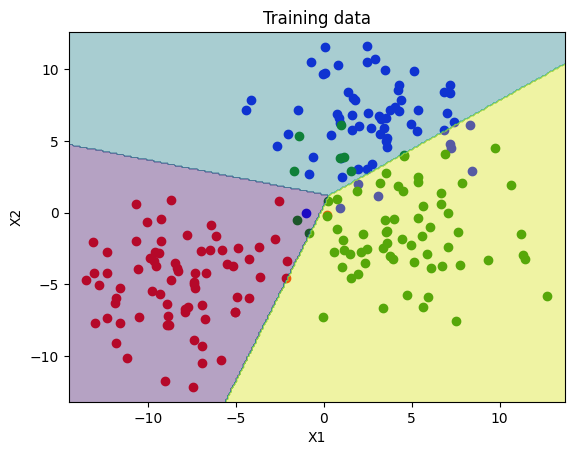

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.8809523809523808
Standard deviation: 0.0393829964345435


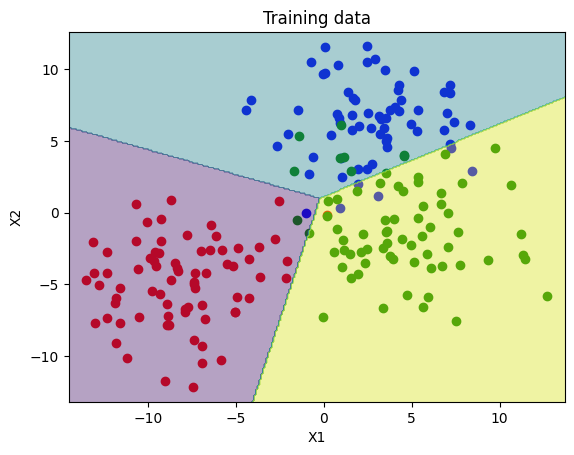

In [32]:
# Parameters
A = 1
B = 10  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

   # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()

Conclure sur l’impact des paramètres A et B. Tenter de les améliorer.

Mean score: 0.13714285714285715
Standard deviation: 0.27428571428571424


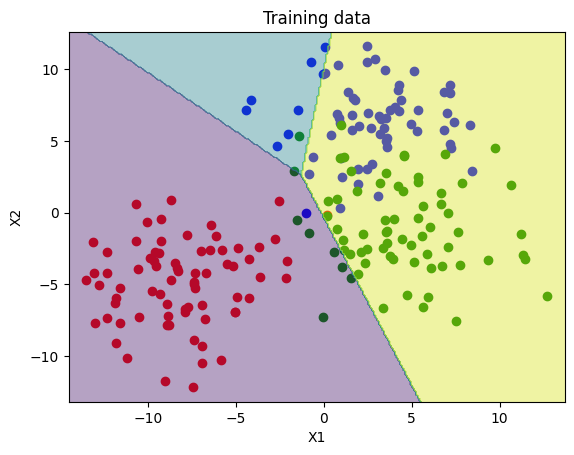

Mean score: 0.32
Standard deviation: 0.39852790340943306


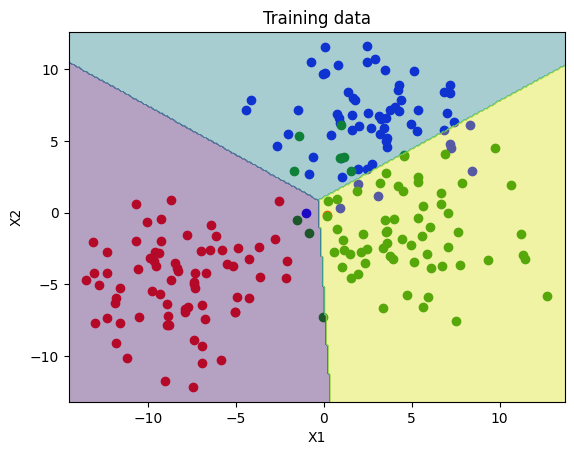

Mean score: 0.5038095238095238
Standard deviation: 0.4199168473997664


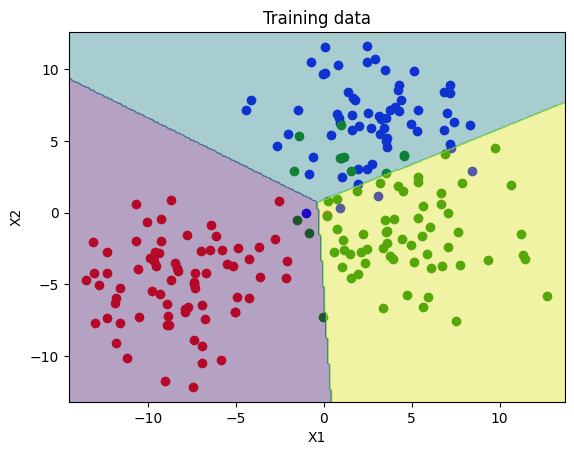

Mean score: 0.6857142857142857
Standard deviation: 0.3541141417633944


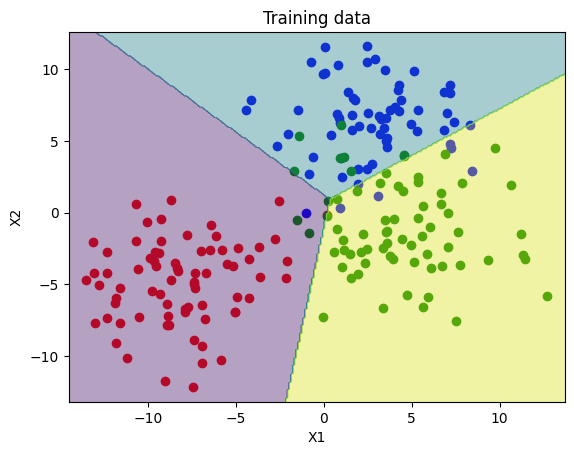

Mean score: 0.8647619047619047
Standard deviation: 0.08987771990403066


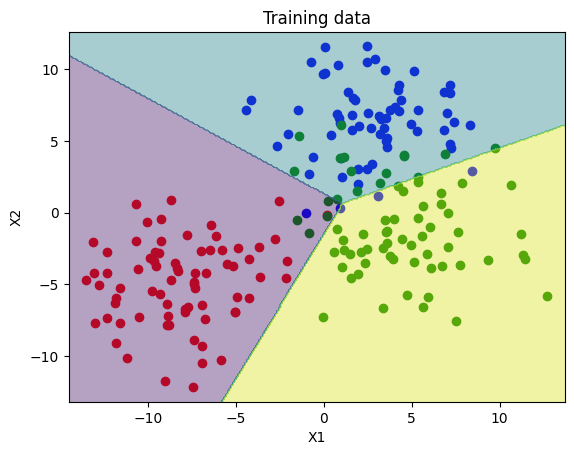

In [33]:
# Parameters
A = 0.0001
B = 100


# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()

Charger le fichier de données dataset2.txt. Répéter l’expérience d) en choisissant
judicieusement A et B. Que doit-on changer pour résoudre ce problème de classification ?

Number of observations: 600
Dimensions: 2
Number of classes: 2
Mean score: 0.06952380952380952
Standard deviation: 0.13904761904761903
Mean score: 0.21095238095238095
Standard deviation: 0.2822713189569017
Mean score: 0.33238095238095233
Standard deviation: 0.29567785988368633
Mean score: 0.43238095238095237
Standard deviation: 0.24687893054938154
Mean score: 0.5371428571428571
Standard deviation: 0.11939568165635615


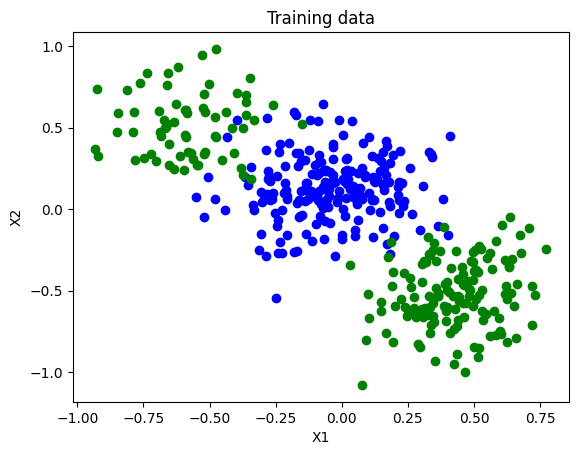

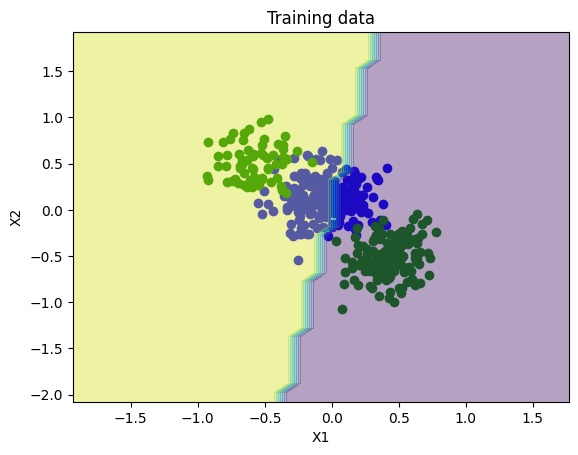

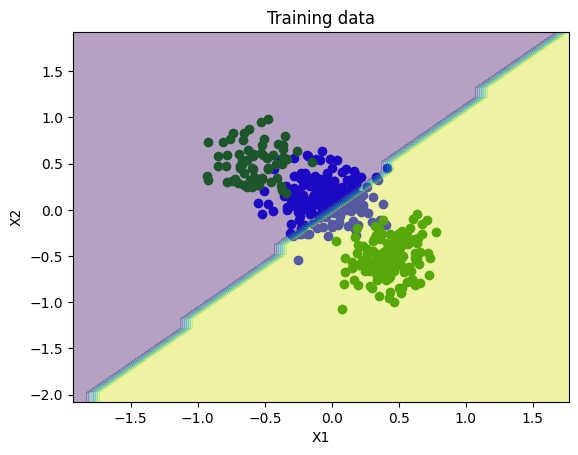

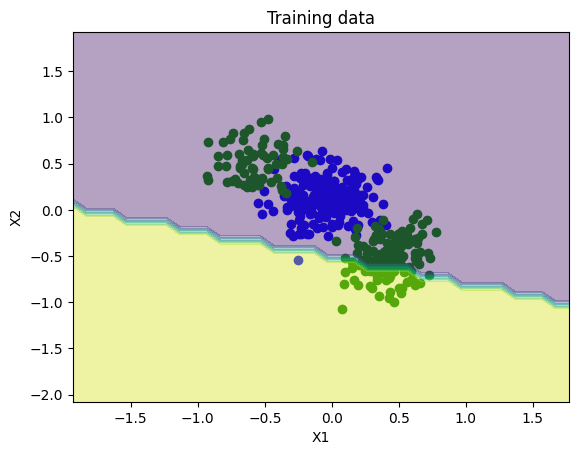

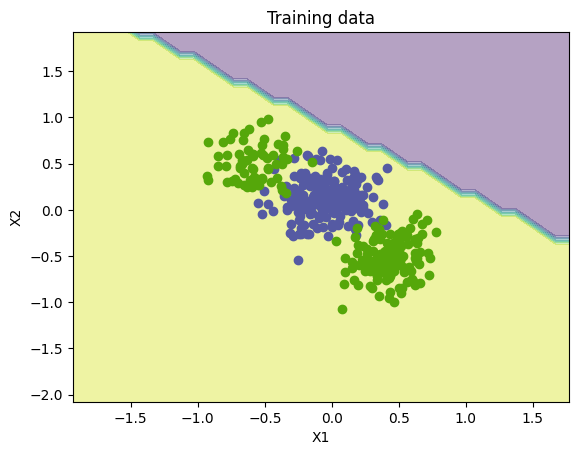

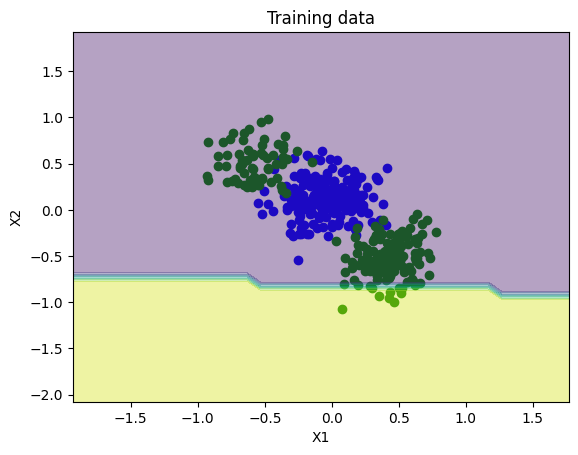

In [43]:
# Load the dataset
data = np.loadtxt('dataset2.txt')

X = data[:, :-1]
y = data[:, -1]

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], color='yellow', label='Class 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Parameters
A = 0.0001
B = 100

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier

for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], color='yellow', label='Class 3')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

# 2. Réseau multi-couche pour la classification
On travaille sur les mêmes données (dataset2).

a) Dans la suite, on utilisera l’instruction suivante pour définir un réseau de neurones classifieur
multi-couche :

```clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='constant')```

À quoi correspondent ces différents paramètres ?

In [45]:

from sklearn.neural_network import MLPClassifier

# Parameters
C = (100,)
A = 0.001
B = 100

# Create the classifier
clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='constant')


* C correspond au nombre de neurones dans la couche cachée.
* A correspond au taux d'apprentissage.
* B correspond au nombre d'itérations maximales.

b) Pour C = 1 :

Entraîner le réseau.

Afficher l’évolution de la fonction de coût (clf2.loss_curve_) et le coût minimum
(clf2.best_curve_).

Comment utiliser cette information pour choisir correctement B ?

Afficher le score sur les données d’apprentissage et les frontières générées.

Conclure.

Best loss: 0.6777780931089021
Score: 0.530952380952381


<Figure size 640x480 with 0 Axes>

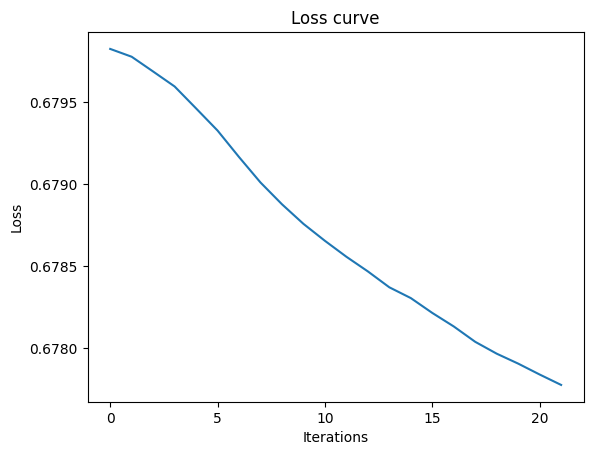

<Figure size 640x480 with 0 Axes>

In [46]:
# Parameters
C = (1,)
A = 0.001
B = 100

# Create the classifier
clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='constant')

# Train the classifier
clf2.fit(X_train, y_train)

# Display the loss curve
plt.figure()
plt.plot(clf2.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')

# Display the best loss
print(f'Best loss: {clf2.best_loss_}')

# Display the score
print(f'Score: {clf2.score(X_train, y_train)}')

# Display the data
plt.figure()

Conclusion :
Best loss: 0.6777780931089021
Score: 0.530952380952381

La courbe de perte montre que la perte diminue avec le nombre d'itérations. La meilleure perte est de 0.6777780931089021. Le score sur les données d'apprentissage est de 0.530952380952381. Les frontières de décision ne sont pas très bonnes, ce qui se reflète dans le faible score.